# EM Counterpart Modelling of BBH mergers in AGN disks

### Reproducing the results from the model in Tagawa et al. (2023)

We use the equations from the paper: Tagawa et al. 2023 (https://iopscience.iop.org/article/10.3847/1538-4357/acc4bb/pdf)  
In addition, referring to papers:  
To calculate the $\mathrm{L_j}$ (jet Luminosity) and $\tilde{\mathrm{L}}$ (jet energy density and rest mass energy density ratio): Tagawa et al. 2022 (https://iopscience.iop.org/article/10.3847/1538-4357/ac45f8/pdf)  
To calculate the AGN disk properties (solved numerically): Gangardt et al. 2024 (https://arxiv.org/pdf/2403.00060) & (https://github.com/DariaGangardt/pAGN#)  
Values of the shock/jet head velocity are taken from Tagawa et al. 2022 itself which summarised the equations from Bromberg et al. 2011 (https://iopscience.iop.org/article/10.1088/0004-637X/740/2/100/pdf)  
Additionally Nakar & Sari (2010 & 2012) were refered to for understanding purpose (https://iopscience.iop.org/article/10.1088/0004-637X/725/1/904/pdf & https://iopscience.iop.org/article/10.1088/0004-637X/747/2/88/pdf)

In [1]:
"""
Importing the pAGN module from Gangardt et al. 2024. We use the Thompson model for AGN disks as used in the Tagawa et al. 2023 paper
"""

from pagn import Thompson
from pagn import Sirko
import numpy as np
import matplotlib.pyplot as plt
import pagn.constants as ct

import pandas as pd
import math
from scipy.optimize import brentq

In [2]:
"""
The Thompson model has the following input parameters: SMBH mass, velocity dispersion value (sigma), star formation efficiancy (epsilon),
the radiative efficiency of supernovae (xi), angular momentum transfer parameter (m), gas inflow rate at the outer boundary (Mdot_out/Min),
Radius of inner boundary of AGN disc (Rin), the outer disk boundary (Rout) (this is also the radius beyond which disk accretion rate is no longer constant).
Out of these, either sigma or SMBH mass is calculated using the M-sigma relation.
If Rin is None the package uses 6 timesgravitational radii of SMBH, if Rout is None 1e7 times Schwarzchild radii is used
"""

#### Parameters for the AGN disk model using pAGN
#sigma = 300e3 #stellar dispersion relation
mbh = 1e8*ct.MSun    #(2e8*ct.MSun) * ((sigma / 200e3) ** 4)
epsilon=1e-3 #Star formation radiative efficiency
m= 0.5 #Value for angular momentum efficiency as suggested by Thompson et al. 2005
xi= 1. #Approximate supernovae radiative fraction as suggested by Thompson et al. 2005
Mdot_out=11.34*ct.MSun/ct.yr #For mbh in 10^8-10^9 Msun range, the outer accretion rate scaling should be sufficient for bright AGN formation
Rout=100*ct.pc #Let's use 1e7 Schwarzchild radii for outer boundary
Rin= None #1e-3*ct.pc #Rin is 3 Schwarzchild radii
opacity="combined" #most up to date opacity values

#### Parameters for the EM counterpart modelling
m_SMBH = 1e8
m_rem = 150
eta_j = 0.5
#Mdot_inj = 
alpha_AGN = 0.1
f_acc = 15
theta_0 = 0.3
mag_ampl = 0.1     #epsilon_B
elec_frac =0.3     #epsilon_e
p = 2.5
#mdot_BHL
#mdot = f_acc*mdot_BHL
#L_j = eta_j*mdot
c = 3e10
h = 6.6261e-27
kb = 1.3807e-16

In [3]:
### Use pAGN to solve the numerical equations to find the properties of the AGN disk


tho = Thompson.ThompsonAGN(Mbh = mbh, epsilon = epsilon, m = m, xi = xi,
                      Mdot_out= Mdot_out, Rout = Rout, Rin = Rin, opacity =opacity)
tho.solve_disk(N=1e4)

sigma from M using M-sigma relation
### Thompson et al. 2005 parameters ###
Mbh = 1.000000e+08 MSun
Mdot_out = 1.134000e+01 MSun/yr
Rs = 9.570121e-06 pc
Rin = 3.000000e+00 Rs
Rout = 1.044919e+07 Rs = 1.000000e+02 pc
sigma = 1.879994e+02 km/s
epsilon =  0.001
m =  0.5
xi =  1.0
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
 ### Beginning integration at Rmax ###
### Switching to no star formation regime at i = 6625, R = 64788.48790370214Rs ###
Mdisk = 158864575.25977123 Msun
Mdisk/Mbh = 1.588645752597712


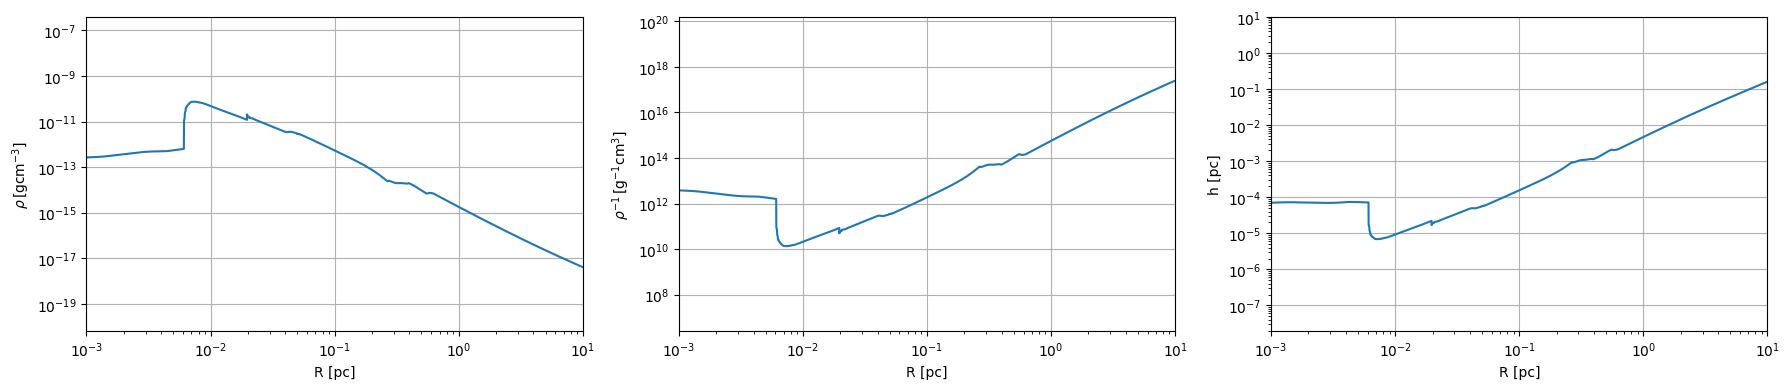

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[0].plot(tho.R/ct.pc, tho.rho*ct.SI_to_gcm3, '-', color='tab:blue')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax[0].axhline(y=1.1e-16, color='red', linestyle='--', lw=1.0)
#ax[0].axvline(x=2.5, color='black', linestyle='--', lw=1.0)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim([1e-3, 10])
ax[0].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
#ax.legend()
ax[0].set_xlabel(r"R [pc]", fontsize=10)
ax[0].set_ylabel(r"$\rho \, [\mathrm{g cm^{-3}}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')
#plt.show()

#fig, ax = plt.subplots(figsize=(6, 4))

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[1].plot(tho.R/ct.pc, (tho.rho*ct.SI_to_gcm3)**-1, '-', color='tab:blue')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=1.1e-16, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim([1e-3, 10])
ax[1].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
#ax.legend()
ax[1].set_xlabel(r"R [pc]", fontsize=10)
ax[1].set_ylabel(r"$\rho^{-1} \, [\mathrm{g^{-1} cm^{3}}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')
#plt.show()

#fig, ax = plt.subplots(figsize=(6, 4))

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[2].plot(tho.R/ct.pc, tho.h/ct.pc, '-', color='tab:blue')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax[2].axhline(y=0.0215, color='red', linestyle='--', lw=1.0)
#ax[2].axvline(x=2.5, color='black', linestyle='--', lw=1.0)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlim([1e-3, 10])
ax[2].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
#ax.legend()
ax[2].set_xlabel(r"R [pc]", fontsize=10)
ax[2].set_ylabel(r"h [pc]", fontsize=10)

fig.tight_layout()
#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')
plt.show()

### Defining all the functions to calculate the properties of the EM counterpart of the BBH merger remnant

Below, we define the functions that we will use. Nearly all of them are from Tagawa et al. 2023, and the locations from the paper where we find the equations are written before the start of every function. All the functions are either dependent on the functions defined here or the parameters of the AGN disk like density of scale height of the disk or the velocity of the shock waves from the emitted jets.

In [5]:
"""
Refer to Tagawa et al. 2022 paper Appendix A.2. Equations A2, A3 & A7 to calculate beta_sf, L_tilde, and L_j respectively.
"""

def L_j(rho_AGN, H_AGN, R):
    mdot_cap = 3e-4*(H_AGN/0.003)*(R)**(1/2)*(rho_AGN/4e-17)*(m_rem/10)**(2/3)*(m_SMBH/1e6)**(-1/6) #Calculate mdot_cap from eq 1 in Tagawa et al. 2022
    return 1e42*(mdot_cap/3e-4)*(eta_j/0.5)*(f_acc/0.1)  

def L_tilde(L_j, rho_AGN, H_AGN):
    """
    L_tilde is a 3 part branched function of jet luminosity, AGN density and AGN height.
    theta_0 is the opening angle at the base of the jet
    """
    L_tilde_1 = (L_j**2/(rho_AGN**2*theta_0**8*c**6*(3.086e18*H_AGN)**4))**(1/3)  ## L_tilde_1 is the first branch for regions where L_tilde<1.
    L_tilde_2 = (L_j/(rho_AGN*theta_0**4*c**3*(3.086e18*H_AGN)**2))**(2/5)   ## L_tilde_2 is the second branch for regions where 1<L_tilde<theta_0**(-4/3).
    L_tilde_3 = L_j/(rho_AGN*theta_0**2*c**3*(3.086e18*H_AGN)**2)    ## Final branch for remaining values of L_tilde
    cond1 = (L_tilde_1 < 1.0)  ## finding indices satisfying the first condition
    upper = theta_0**(-4.0/3.0) ## the upper limit for the second branch of the function
    cond2 = np.logical_and(L_tilde_1  >= 1.0, L_tilde_2 < upper)  ## 1.0 is the upper limit of the first branch in the function
    #Ltmp = np.where(cond1, L_tilde_1, L_tilde_2)
    result = np.where(cond1, L_tilde_1, np.where(cond2, L_tilde_2, L_tilde_3))
    """
    In this function, the we first calculate what the possible values of L_tilde could be based on all the branches.
    Then we generate a boolean array (cond1) which has the values for the first branch.
    Following this, we generate the same for the second branch (cond2).
    np.where will simply apply the condition and take values from either array (first array if True, second otherwise).
    np.where(cond2, L_tilde_2, L_tilde_3) this will return an array which also takes L_tilde_3 values for places which should be
    for L_tilde_1, but this is fixed when we apply condtion1 in the same line of code.
    """
    return result

#def beta_sf(L_tilde):
#    L_tilde = np.atleast_1d(L_tilde)
#    beta_sf = np.zeros(len(L_tilde))
#
#    for i in range(len(L_tilde)):
#        if L_tilde[i] < 1:
#            beta_sf[i] = np.sqrt(L_tilde[i])
#        else:
#            beta_sf[i] = 1.0
#    return beta_sf[0] if beta_sf.size == 1 else beta_sf



def gamma_from_beta(beta):
    """
    Calculates the Lorentz factor from the velocity.
    """
    return (1-beta**2)**(-1/2)

def beta_from_gamma(gamma):
    """
    Calculates the velocity from the Lorentz factor.
    """
    return (1-1/gamma**2)**(1/2)

def beta_FS_from_beta_sf(beta_sf):
    """
    A function to calculate the velocity of the shock front from the shocked fluid.
    The equation is gamma_FS = sqrt(2)*gamma_sf. But we have to convert it to velocity.
    """
    return beta_from_gamma(np.sqrt(2)*gamma_from_beta(beta_sf))


"""
The following is the calculation of possible oberservable properties of the EM counterpart.
Most of the equations are taken from the EM counterpart model from the Tagawa et al. 2023 paper.
Mostly the variables used are the properties of the AGN disk like scale height of the AGN disk, 
and the velocity of the waves shock front and the parameters/functions defined above.
Disclaimer: In all the functions below and above, H_AGN is inputed and considered in parsecs, whereas rho_AGN is in g/cm^3.
"""

def t_delay_newt(H_AGN, beta_FS):
    """
    This is the time delay between the gravitational wave emission and the breakout emission.
    We use Equation 4 from the Tagawa et al. 2023. 
    Technically the value should be lowered by the time needed by the GW to scale the height,
    but since the speed of the shock is low (nonrelativitic), we can neglect that value.
    """
    return 0.3*(3.086e18*H_AGN/5e16)*(beta_FS/0.1)**(-1)  #returns in yr

def t_break_newt(H_AGN, beta_FS):
    """
    Same as the function above. This is actually the time of the breakout emission, but due to the reasons mentioned above,
    this also becomes t_delay in the nonrelativistic case.
    """
    return 0.3*((3.086e18*H_AGN)/5e16)*(beta_FS/0.1)**(-1)  #returns in yr

def T_breakout_newt_low(rho_AGN, beta_FS):
    """
    The thermal equilibrium temperature at shock breakout for the low velocity Newtonian case.
    We use Equation 2 from Tagawa et al. 2023 for this.
    """
    return 1e4*(rho_AGN/1e-16)**(1/4)*(beta_FS/0.02)**(1/2)

def t_breakout_newt(beta_FS, rho_AGN):
    """
    This is the duration of emission from the breakout shell. 
    We define breakout the moment when the time required for photons to diffue out is equal to the time
    for the shock to expand the same distance to surface of the AGN disk.
    This time is the time required for the last few photons to be released. Thus also making this the duration of the breakout emission.
    We use Equation 3 from Tagawa et al. 2023 for this.
    """
    return 3*(rho_AGN/1e-16)**(-1)*(beta_FS/0.1)**(-2)    #returns in yr

def t_duration_newt(beta_FS, rho_AGN):
    """
    For reasons explained above, same equation as above.
    For the relativistic case, things are different because of production/annhilation of pairs (refer to Nakar & Sari 2012).
    """
    return 3*(rho_AGN/1e-16)**(-1)*(beta_FS/0.1)**(-2)    #returns in yr

def L_sh_newt(H_AGN, rho_AGN, beta_FS, R):
    """
    The kinetic power of the shock, 
    which is the rate at which energy is taken up by the shock and converted to internal energy of the matter.
    We consider a cone of half angle theta_j being the base of the cylinder which produces the emission.
    This becomes the volume of this cylinder * density * velocity **2.
    volume=A*(v*t), A=pi*(theta*H)**2
    We use Equation 5 from Tagawa et al. 2023
    """
    theta_j = (L_j(rho_AGN, H_AGN, R)*theta_0**6*beta_FS**2/(rho_AGN*(3.086e18*H_AGN) **2*c**3))**(1/10)
    return 5e43*(theta_j/0.05)**2*((3.086e18*H_AGN)/5e16)**2*(rho_AGN/1e-16)*(beta_FS/0.1)**3    #returns in erg/s

def L_breakout_newt(H_AGN, rho_AGN, beta_FS, R):
    """
    The rate at which energy trapped inside as radiation escapes at breakout.
    Typically a fraction of the internal energy stored, however in the nonrelativistic case,
    most of the kinetic power escapes out as breakout luminosity.
    """
    theta_j = (L_j(rho_AGN, H_AGN, R)*theta_0**6*beta_FS**2/(rho_AGN*(3.086e18*H_AGN)**2*c**3))**(1/10)
    return 5e43*(theta_j/0.05)**2*((3.086e18*H_AGN)/5e16)**2*(rho_AGN/1e-16)*(beta_FS/0.1)**3    #returns in erg/s

def L_sh_rel(H_AGN, rho_AGN, beta_FS, gamma_FS, R):
    """
    Same as in the realtivistic case, however we have to consider the relativistic energy this time.
    This brings a factor of gamma into the equation. The formula becomes volume*gamma*rho*c**2, 
    with volume calculated as before.
    We use Equation 13 from Tagawa et al. 2023
    """
    theta_j = (L_j(rho_AGN, H_AGN, R)*theta_0**6*beta_FS**2/(rho_AGN*(3.086e18*H_AGN)**2*c**3))**(1/10)
    return 5e46*(theta_j/0.05)**2*((3.086e18*H_AGN)/5e16)**2*(rho_AGN/1e-16)*(beta_FS)*gamma_FS**2   #returns in erg/s

def L_breakout_rel(H_AGN, rho_AGN, beta_FS, gamma_FS, gamma_sf, gamma_sf_f, R):
    """
    The breakout luminosity for the relativistic case. We have to account for relativistic effects here,
    such as the beaming factor due to the 
    and an additional gamma_sf_f/(4*gamma_sf) factor due to reduction in internal energy due to adiabatic expansion
    which in turn is due to pair production/annhilation of electrons/positrons.
    We use Equation 14 from Tagawa et al. 2023
    """
    theta_j = (L_j(rho_AGN, H_AGN, R)*theta_0**6*beta_FS**2/(rho_AGN*(3.086e18*H_AGN)**2*c**3))**(1/10)
    #gamma_sf = gamma_FS/np.sqrt(2) ## To obtain the initial Lorentz factor of the shocked fluid from the initial Lorentz factor of the shock wave
    #gamma_sf_f = gamma_sf**(1+np.sqrt(3)) ## Calculate the final Lorentz factor of the shocked fluid.
    f_beam = 2*gamma_sf_f**2 
    return 5e46*f_beam*(theta_j/0.05)**2*(3.086e18*H_AGN/5e16)**2*(rho_AGN/1e-16)*(beta_FS)*gamma_FS**2*(gamma_sf_f/(4*gamma_sf))   #returns in erg/s

#def t_trans(x):
#    return x

def t_delay_rel(H_AGN, beta_FS, gamma_FS, t_trans=None):
    """
    In the relativistic case, the time required for the GW travel time becomes significant when compared to
    the breakout time. Further, due to the pair annhilation, the environment becomes optically thicker, and we need to take into
    account the time taken for the shocks to become transparent (t_trans).
    We use Equation 7, 8 & 9 from Tagawa et al. 2023 to calculate this.
    """
    #gamma_FS = (1 - beta_FS**2)**(-1/2)
    ## Equation 8. We divide by constants to get the appropriate value in years. 
    t_break_rel = 1/4*(3.086e18*H_AGN)/(gamma_FS**2*c*60*60*24*365)    #returns in yr
    """
    This part is just added because I have not completely figured out the correct formula for t_trans. 
    Will be removed once that is ready.
    """
    if t_trans is None:
        return t_break_rel    #returns in yr
    else:
        #return_vals = []
        #for i in range(len(H_AGN)):
        return_vals = np.maximum(t_break_rel, t_trans)
        return return_vals

def t_breakout_rel(rho_AGN, beta_FS, gamma_FS):
    """
    Same as for the non realtivistic case, however we need to account for the beaming affect, pair production
    & the Klein-Nishina effect.
    We use Equation 12 from Tagawa et al. 2023.
    """
    #gamma_FS = (1 - beta_FS**2)**(-1/2)
    ## As this equation is just a factor of 1/(100*gamma_FS) times the t_breakout for nonrelativistic case, we directly
    ## multiply this factor to the previous equation.
    return 0.03*(rho_AGN/1e-16)**(-1)*(beta_FS/0.1)**(-2)*gamma_FS**(-1)    #returns in yr

def t_ang(H_AGN, gamma_sf_f):
    """
    We use Equation 11 from Tagawa et al. 2023 to calculate this.
    """
    #gamma_sf = gamma_FS/np.sqrt(2) ## To obtain the initial Lorentz factor of the shocked fluid from the initial Lorentz factor of the shock wave
    #gamma_sf_f = gamma_sf**(1+np.sqrt(3)) ## Calculate the final Lorentz factor of the shocked fluid.
    return 1/2*3.086e18*H_AGN/(gamma_sf_f**2*c*60*60*24*365)    #returns in yr

def t_duration_rel(rho_AGN, H_AGN, beta_FS, gamma_FS, gamma_sf_f, t_trans=None):
    """
    Same discussion for duration as in the nonrelativistic case, however, we need to take into account the time required for the emission
    to become transparent, and the relatvistic affect of emmision from a circular shell shaped geometry.
    We use Equation 10, 11, 12, and 8 for this.
    """
    #gamma_sf = gamma_FS/np.sqrt(2)  ## To obtain the initial Lorentz factor of the shocked fluid from the initial Lorentz factor of the shock wave
    #gamma_sf_f = gamma_sf**(1+np.sqrt(3)) ## Calculate the final Lorentz factor of the shocked fluid.
    t_breakout_rel = 0.03*(rho_AGN/1e-16)**(-1)*(beta_FS)**(-2)*gamma_FS**(-1)  ##Calculating the duration of breakout for the relativistic case returns in yr
    t_ang = 1/2*3.086e18*H_AGN/(gamma_sf_f**2*c*60*60*24*365)  ##Calculating the timescale in which radiation emitted by the same shell is observed returns in yr
    """
    This part is just added because I have not completely figured out the correct formula for t_trans. 
    Will be removed once that is ready
    """
    if t_trans is None:
        #return_vals = []
        #for i in range(len(H_AGN)):
        return_vals = np.maximum(t_breakout_rel, t_ang)
        return return_vals
    else:
        #return_vals = []
        #for i in range(len(H_AGN)):
        return_vals = np.maximum(t_breakout_rel, t_ang, t_trans)
        return return_vals

def T_breakout_low_newt(beta_FS, rho_AGN):
    """
    The temperature at breakout for the low velocity nonrelativistic case.
    We use Equation 2 from Tagawa et al. 2023 to calculate this.
    """
    return 1e4*(beta_FS/0.02)**(1/2)*(rho_AGN/1e-16)**(1/4)    #returns in K

def T_breakout_high_newt(beta_FS, rho_AGN):
    """
    The temperature at breakout for the slightly higher velocity nonrelativistic case.
    We use Equation 6 from Tagawa et al. 2023 to calculate this.
    """
    return 1e4*10**(0.975+1.735*(beta_FS/0.1)**(1/2)+(0.26-0.08*(beta_FS/0.1)**(1/2))*np.log10(rho_AGN/1.673e-15))    #returns in K

def T_breakout_high_rel(gamma_sf_f):
    """
    The temperature at breakout for the relativistic case.
    This case is very different as when temperatures increase above 50KeV, electron/positron pairs are produced.
    This enhances the production of photons in the shock and the temperature is controlled at ~100-200KeV.
    We calculate the breakout temperature using the equation 50KeV*gamma_sf_f/kb.
    """
    #gamma_sf = gamma_FS/np.sqrt(2)  ## To obtain the initial Lorentz factor of the shocked fluid from the initial Lorentz factor of the shock wave
    #gamma_sf_f = gamma_sf**(1+np.sqrt(3))  ## Calculate the final Lorentz factor of the shocked fluid.
    return 50000*gamma_sf_f/8.6173303e-5      #returns in K

#def sed_bb(nu, temp_breakout):
#    """
#    """
#    return nu*2*h/c**3*(nu**2)*(1/(np.e**((h*nu)/(kb*temp_breakout))-1))

#def sed_wien(nu, temp_breakout):
#    """
#    """
#    return nu*2*h/c**2*(nu**2)*(np.e**(-(h*nu)/(kb*temp_breakout)))

def sed_wien(nu, temp_breakout, L_breakout):
    """
    The spectral distribution of luminosity for the relatively high velocity nonrelatvisitic case.
    As mentioned in Tagawa et al 2023. in this regime, the radiation is not in thermal equilibrium as the photons
    produced by free-free emission is less than required. The distribution is characterised by a Wien distribution spectrum.
    We calculate the distribution of the thermal luminosity by distributing the power of the breakout luminosity accross the frequency domain.
    We use the idea that the integral of L_nu from 0 to infinity should be equal to the the breakout luminosity.
    """
    spect_rad = (2*h/c**2)*nu**3*(np.e**(-(h*nu)/(kb*temp_breakout)))  ## The spectral radiance formula for Wien's distribution spectrum
    norm_factor = (2*h/c**2)*6*(kb*temp_breakout/h)**4   ## Normalisation factor of the spectral radiance obtained by integrating the spectral radiance from 0 to inf wrt frequency
    return nu*L_breakout*spect_rad/norm_factor   ## returns in erg/s
    #return L_breakout*(h*nu/(kb*temp_breakout))**4*(np.exp(-(h*nu/(kb*temp_breakout))))/6

def sed_bb(nu, temp_breakout, L_breakout):
    """
    The spectral distribution of luminosity for the low velocity nonrelativistic case.
    In this case, as the velocity of the forward is shock is low, there is time to produce
    enough photons via free-free emission for the radiation to be in thermal equilibrium.
    Therefore, the radiation can be characterised by a blackbody radiation and thus estimated
    using the Planck's distribution spectrum.
    We calculate the distribution using the same logic as above.
    """
    spect_rad = (2*h/c**2)*nu**3*(1/(np.e**((h*nu)/(kb*temp_breakout))-1))  ## The spectral radiance formula for Planck 's distribution spectrum
    norm_factor = (2*h/c**2)*(kb*temp_breakout/h)**4*(np.pi**4/15)   ## Normalisation factor of the spectral radiance obtained by integrating the spectral radiance from 0 to inf wrt frequency
    return nu*L_breakout*spect_rad/norm_factor

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


"""
The following functions are required to calculate the spectral distribution of the breakout luminosity for the nonthermal emission.
The electrons in the shock have a power law Lorentz factor distribution.
"""
def gamma_min_prime(gamma_sf):
    """
    This is the minimum lorentz factor of the electrons.
    We use Equation 16 from Tagawa et al. 2023
    """
    return 40*(elec_frac/0.3)*((gamma_sf-1)/0.2)

def gamma_max_prime(rho_AGN, gamma_sf):
    """
    This is the minimum lorentz factor of the electrons.
    We use Equation 17 from Tagawa et al. 2023
    """
    xi = 1
    beta_sf = beta_from_gamma(gamma_sf)
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    return 1e6*xi**(-1/2)*(beta_sf/0.5)*(A_gamma_sf/1.5)**(-1/4)*(mag_ampl/0.1)**(-1/4)*(rho_AGN/1e-16)**(-1/4)

def B_prime_sf(rho_AGN, gamma_sf):
    """
    Magnetic field in the shocked medium.
    We use Equation 18 from Tagawa et al. 2023
    """
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    return 6e2*(A_gamma_sf/1.5)**(1/2)*(mag_ampl/0.1)**(1/2)*(rho_AGN/1e-16)**(1/2)

def C_func(q):
    """
    Constants required to calculate the Lorentz factor below which synchrotron self-absorption is effective.
    We use Equation 23 from Tagawa et al. 2023
    """
    return 2**((q+1)/2)/(q+1)*math.gamma(q/4-1/12)*math.gamma(q/4+19/12)

def tau_func(q, gamma_1, gamma_2, rho_AGN, gamma_sf, beta_FS):
    """
    Constants required to calculate the Lorentz factor below which synchrotron self-absorption is effective.
    We use Equation 22 from Tagawa et al. 2023
    """
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    t_c = 30*(mag_ampl/0.1)**(-1)*(A_gamma_sf/1.5)**(-1)*(rho_AGN/1e-16)**(-1)*(gamma_min_prime(gamma_sf)/40)**(-1)*(gamma_sf/1.2)**(-1)
    delta_shell = 5e11*(t_c/30)*(beta_FS/0.5)
    gamma_a_constants = 1.6e-19*3e9*rho_AGN*delta_shell/(B_prime_sf(rho_AGN, gamma_sf)*1.67262192e-24)
    return np.pi/(3*np.sqrt(3))*(2.5**2+2.5-2)*(gamma_1)**(-5)/(1-(gamma_2/gamma_1)**(-2.5+1))*gamma_a_constants

### Calculating the properties

Below we use the function defined above to calculate the properties of the emission. We first reassign the AGN disk properties to variables and the velocity of the shock waves and calculate the determining parameters which will let us know in which regime of relativity will we be in at that location.
For now, we are interpolating the velocity function from the Tagawa et al. 2023 paper figure untill we can calculate the velocity of the shock waves correctly for ourselves.

In [6]:
### Reassign the parameters that I require from tho class to new variables

H_AGN_vals = tho.h/ct.pc
rho_AGN_vals = tho.rho*ct.SI_to_gcm3
R_vals = tho.R/ct.pc

In [7]:
### For now we take the values of the velocity of the fluid and shocked material in an around the jet from the Tagawa et. at. 2023 paper

read_web_plot_digitizer_pd = pd.read_csv('/home/spandan11/Downloads/Beta_vals.csv')
R_vals_prot = read_web_plot_digitizer_pd['R'].values
beta_vals_prot = read_web_plot_digitizer_pd['Beta'].values

beta_vals = np.interp(R_vals, R_vals_prot, beta_vals_prot) # Interpolating Tagawa's results for beta at R
gamma_vals = gamma_from_beta(beta_vals)

beta_gamma_vals = beta_vals*gamma_vals

In [8]:
"""
We first calculate the properties of each regime for the whole disk regardless of whether it belongs to that regime or not.
We will later find the final values of these properties based on the velocity criteria.
Our regimes are separated as follows:
beta_FS*gamma_FS <= 0.03, nonrelativisitic low velocity regime
0.03 <= beta_FS*gamma_FS <= 1, relatively high velocity nonrelativistic regime
1 < beta_FS*gamma_FS, relativistic regime
I rewrote the code to use numpy vectorisation techniques instead of for loops following Om's suggestion.
This should make things faster.
"""
gamma_sf_vals = np.where(beta_gamma_vals<1, gamma_vals, gamma_vals/np.sqrt(2)) #gamma_sf_val_new.copy() # #np.maximum(gamma_vals/np.sqrt(2), 1)
gamma_sf_f_vals = np.where(beta_gamma_vals<1, gamma_vals, (gamma_vals/np.sqrt(2))**(1+np.sqrt(3))) #gamma_sf_val_new**(1+np.sqrt(3)) #np.where(beta_gamma_vals<1, gamma_vals, (gamma_vals/np.sqrt(2))**(1+np.sqrt(3))) #gamma_sf_vals**(1+np.sqrt(3))

#gamma_sf_vals = gamma_sf_val_new.copy()
#gamma_sf_f_vals = gamma_sf_val_new**(1+np.sqrt(3))

L_j_test = L_j(rho_AGN_vals, H_AGN_vals, R_vals)
L_tilde_test = L_tilde(L_j_test, rho_AGN_vals, H_AGN_vals)

t_ang_vals = t_ang(H_AGN_vals, gamma_sf_f_vals)
t_breakout_rel_vals = t_breakout_rel(rho_AGN_vals, beta_vals, gamma_vals)

t_delay_newt_vals = t_delay_newt(H_AGN_vals, beta_vals)
t_duration_newt_vals = t_duration_newt(beta_vals, rho_AGN_vals)
L_sh_newt_vals = L_sh_newt(H_AGN_vals, rho_AGN_vals, beta_vals, R_vals)
L_breakout_newt_vals = L_breakout_newt(H_AGN_vals, rho_AGN_vals, beta_vals, R_vals)

L_sh_rel_vals = L_sh_rel(H_AGN_vals, rho_AGN_vals, beta_vals, gamma_vals, R_vals)
L_breakout_rel_vals = L_breakout_rel(H_AGN_vals, rho_AGN_vals, beta_vals, gamma_vals, gamma_sf_vals, gamma_sf_f_vals, R_vals)
t_delay_rel_vals = t_delay_rel(H_AGN_vals, beta_vals, gamma_vals, t_trans=None)
t_duration_rel_vals = t_duration_rel(rho_AGN_vals, H_AGN_vals, beta_vals, gamma_vals, gamma_sf_f_vals, t_trans=None)

T_breakout_low_newt_vals = T_breakout_low_newt(beta_vals, rho_AGN_vals)
T_breakout_high_newt_vals = T_breakout_high_newt(beta_vals, rho_AGN_vals)
T_breakout_high_rel_vals = T_breakout_high_rel(gamma_sf_f_vals)

In [9]:
"""
In this part we calculate in which regime (relativistic or nonrelativistic) which the system lies for each R coordinate
and take that value as the final version.
"""

t_delay_vals = np.where(beta_gamma_vals<1, t_delay_newt_vals, t_delay_rel_vals)
t_duration_vals = np.where(beta_gamma_vals<1, t_duration_newt_vals, t_duration_rel_vals)
L_sh_vals = np.where(beta_gamma_vals<1, L_sh_newt_vals, L_sh_rel_vals)
L_breakout_vals = np.where(beta_gamma_vals<1, L_breakout_newt_vals, L_breakout_rel_vals)

f_beaming = np.where(beta_gamma_vals<1, 1, 2*gamma_sf_vals**2)
f_duration = np.where(beta_gamma_vals<1, 1, t_duration_vals)
L_nonthermal_vals = elec_frac*f_beaming*f_duration*L_sh_vals

T_breakout_vals = np.where(beta_gamma_vals<0.03, T_breakout_low_newt_vals, 
                           np.where((0.03<=beta_gamma_vals) & (beta_gamma_vals<1), T_breakout_high_newt_vals, T_breakout_high_rel_vals))

In [10]:
gamma_min_prime_vals = gamma_min_prime(gamma_sf_vals)
gamma_max_prime_vals = gamma_max_prime(rho_AGN_vals, gamma_sf_vals)
B_prime_sf_vals = B_prime_sf(rho_AGN_vals, gamma_sf_vals)

nu_sync_vals = 2e9*(gamma_sf_vals/1.2)*(B_prime_sf_vals/600)   ## Synchrotron frequency value Equation 24 from Tagawa et al. 2023
nu_min_vals = 3e12*(gamma_min_prime_vals/40)**2*(nu_sync_vals/2e9)  ## Frequency value corresponding to minimum Loretz factor of electrons Equation 25 from Tagawa et al. 2023
nu_max_vals = 3e21*(gamma_max_prime_vals/1e6)**2*(nu_sync_vals/2e9)  ## Frequency value corresponding to maxmum Loretz factor of electrons Equation 26 from Tagawa et al. 2023

gamma_a_prime_vals = gamma_min_prime_vals*(tau_func(2.5, gamma_min_prime_vals, gamma_max_prime_vals, rho_AGN_vals, gamma_sf_vals, 
                                                 beta_vals)*C_func(2.5+1))**(1/(2.5+4))   ## Lorentz factor below which synchrotron self-absorption is effective Equation 21 from Tagawa et al. 2023

nu_a_vals = 7e12*(gamma_a_prime_vals/60)**2*(nu_sync_vals/2e9)  ## Frequency value corresponding to maxmum Loretz factor of electrons Equation 27 from Tagawa et al. 2023

### The next cell block is to calculate the spectral distribution of the thermal Luminosity and nonthermal Luminosity

We calculate the spectral distribution of the thermal Luminosity at the breakout Luminosity and the distribution of nonthermal luminosities like the luminosity by synchrotron radiation

In [11]:
idx_val = find_nearest(R_vals, 2.5) ## This will give me the index for which 2.5 parsecs is closest to

"""
We first calculate the spectrum for the thermal luminosity. We select 2.5 parsecs for our R coordinate because
according to Tagawa et al. 2023, this is the distance from AGN centre where the t_duration, t_delay 
and nonthermal Luminosity simultaneously match the observed data. If we change the system, we will have to manually find
the values that could match the specific data and continue.
For our case, at 2.5 parsecs, the system is in the relatively high velocity nonrelativistic case. Therefore we select the Wien's spectrum
to calculate the distribution of Luminosity at breakout.
"""
nu_vals = np.logspace(16, 21, 100000) ## This is the frequency range where we can observe the peak of the spectrum in the data
sed_wien_vals = sed_wien(nu_vals, T_breakout_vals[idx_val], L_breakout_vals[idx_val]) ## Wien's spectrum distribution at breakout temperature and breakout Luminosity

"""
We are using the first case of luminosity spectrum by synchrotron radiation (Equation 28 from Tagawa et al. 2023) that is where our nu_a and nu_m are valid.
We will have to make changes to the code if the other case becomes valid (will make changes to the code later).
"""
L_sync_for_nu_val = L_nonthermal_vals[idx_val]/(1+(elec_frac/mag_ampl)**(1/3)+(elec_frac/mag_ampl)**(2/3))  #This would be the synchrotron luminosity at 2.5 parsecs

nu_vals1 = np.logspace(11, 21, 100000) ## create the frequency range where we expect to observe the spectrum peak

nu_L_nu_nonthermal_vals = np.zeros_like(nu_vals1) ## create an array of zeros of the same size as the frequency range

mask1 = (nu_min_vals[idx_val] < nu_vals1) & (nu_vals1 < nu_max_vals[idx_val])  ## we generate a truth array of the indices where the first branch is valid
mask2 = (nu_a_vals[idx_val] < nu_vals1) & (nu_vals1 < nu_min_vals[idx_val])  ## we generate a truth array of the indices where the second branch is valid
mask3 = (nu_sync_vals[idx_val] < nu_vals1) & (nu_vals1 < nu_a_vals[idx_val])  ## we generate a truth array of the indices where the third branch is valid

nu_L_nu_nonthermal_vals[mask1] = (nu_vals1[mask1]/nu_min_vals[idx_val])**((-2.5+2)/2) ## The values of the spectrum in the first branch of the equation
nu_L_nu_nonthermal_vals[mask2] = (nu_vals1[mask2]/nu_min_vals[idx_val])**(1/2)  ## The values of the spectrum in the second branch of the equation
nu_L_nu_nonthermal_vals[mask3] = (nu_vals1[mask3]/nu_a_vals[idx_val])**3*(nu_a_vals[idx_val]/nu_min_vals[idx_val])**(1/2) ## The values of the spectrum in the third branch of the equation

nu_L_nu_nonthermal_vals = nu_L_nu_nonthermal_vals*L_sync_for_nu_val ## multiply by the synchrotron luminosity

## Below we plot the results of the properties as a function of R
This will serve two purposes, first, we will get the value of R at which we expect to obtain the observed values of certain properties. And, from the plot of $\mathrm{\gamma_{FS}\beta_{FS}}$ we will be able to observe in which regime is the system is in at differnt R coordinates.

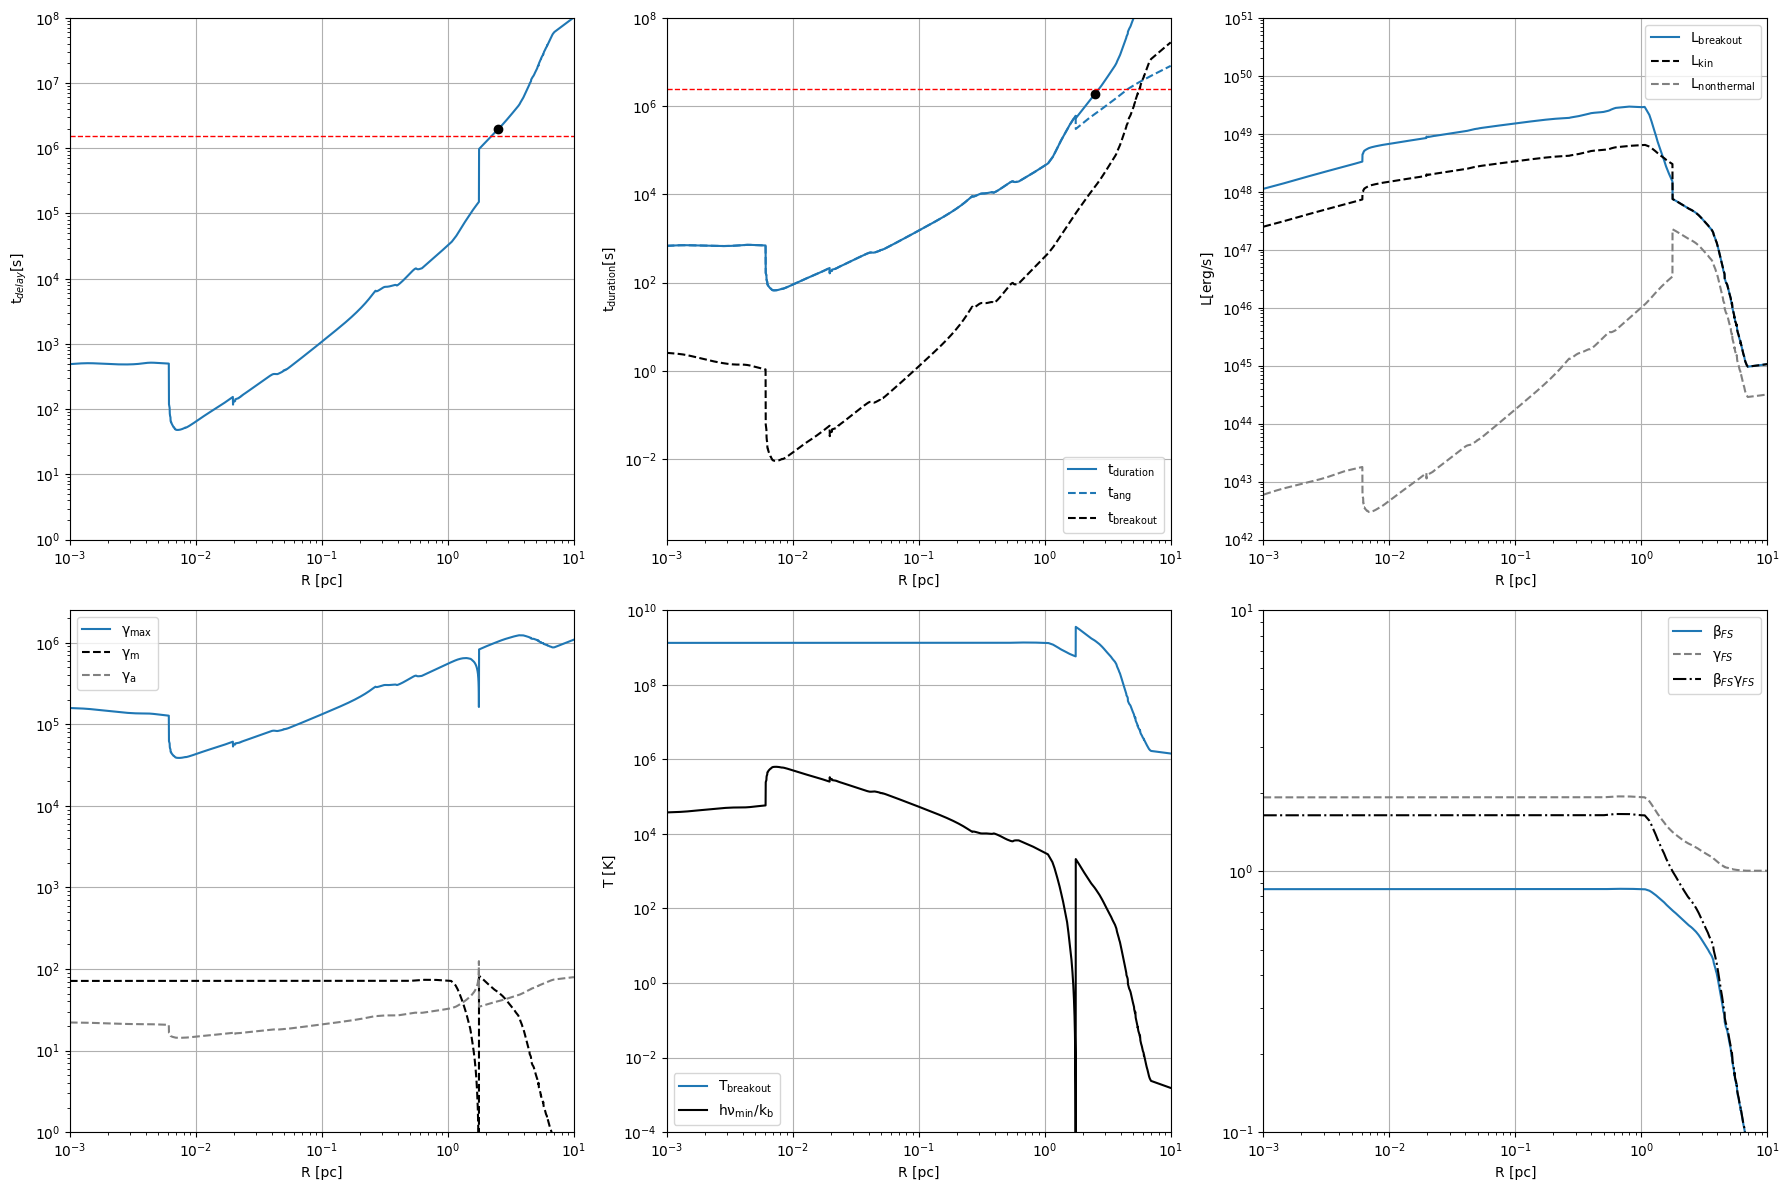

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[1][2].plot(R_vals, beta_vals, '-', color='tab:blue', label=r"$\mathrm{\beta}_{FS}$")
ax[1][2].plot(R_vals, gamma_vals, '--', color='tab:grey', label=r"$\mathrm{\gamma}_{FS}$")
ax[1][2].plot(R_vals, beta_gamma_vals, '-.', color='black', label=r"$\mathrm{\beta}_{FS} \mathrm{\gamma}_{FS}$")
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=0.51, color='red', linestyle='--', lw=1.0)
#ax[1][2].axvline(x=2.5, color='black', linestyle='--', lw=1.0)
ax[1][2].set_xscale('log')
ax[1][2].set_yscale('log')
ax[1][2].set_xlim([1e-3, 10])
ax[1][2].set_ylim([1e-1, 10])
ax[1][2].grid(True)
#ax.axhspan(0.9, 2, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax[1][2].legend()
ax[1][2].set_xlabel(r"R [pc]", fontsize=10)
#ax.set_ylabel(r"$\mathrm{\beta}$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[0][0].plot(R_vals, t_delay_vals*365*24*60*60, '-', color='tab:blue')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=19*24*60*60, color='red', linestyle='--', lw=1.0)
ax[0][0].axhline(y=18*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
ax[0][0].plot(R_vals[7551], t_delay_vals[7551]*365*24*60*60, '.', ms=12, color='black')
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim([1e-3, 10])
ax[0][0].set_ylim([1, 1e8])
ax[0][0].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
#ax.legend()
ax[0][0].set_xlabel(r"R [pc]", fontsize=10)
ax[0][0].set_ylabel(r"$\mathrm{t}_{delay} [\mathrm{s}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')
#plt.show()



#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[0][1].plot(R_vals, t_duration_vals*365*24*60*60, '-', color='tab:blue', label=r"$\mathrm{t}_{\mathrm{duration}}$")
#ax[0][1].plot(R_vals, t_duration_rel_vals*365*24*60*60, '-', color='red', label=r"$\mathrm{t}_{\mathrm{duration_{rel}}}$")
#ax[0][1].plot(R_vals, t_duration_newt_vals*365*24*60*60, '-', color='red', label=r"$\mathrm{t}_{\mathrm{duration_{newt}}}$")
ax[0][1].plot(R_vals, t_ang_vals*365*24*60*60, '--', color='tab:blue', label=r"$\mathrm{t}_{\mathrm{ang}}$")
ax[0][1].plot(R_vals, t_breakout_rel_vals*365*24*60*60, '--', color='black', label=r"$\mathrm{t}_{\mathrm{breakout}}$")
ax[0][1].plot(R_vals[7551], t_duration_vals[7551]*365*24*60*60, '.', ms=12, color='black')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
ax[0][1].axhline(y=28*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
#ax.axvline(x=R_vals[7309], color='black', linestyle='--', lw=1.0)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_xlim([1e-3, 10])
ax[0][1].set_ylim([1.5e-4, 1e8])
ax[0][1].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax[0][1].legend()
ax[0][1].set_xlabel(r"R [pc]", fontsize=10)
ax[0][1].set_ylabel(r"$\mathrm{t}_{\mathrm{duration}} [\mathrm{s}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[0][2].plot(R_vals, L_breakout_vals, '-', color='tab:blue', label=r"$\mathrm{L}_{\mathrm{breakout}}$")
ax[0][2].plot(R_vals, L_sh_vals, '--', color='black', label=r"$\mathrm{L}_{\mathrm{kin}}$")
ax[0][2].plot(R_vals, L_nonthermal_vals, '--', color='grey', label=r"$\mathrm{L}_{\mathrm{nonthermal}}$")
#ax[0][2].plot(R_vals, [8e44]*len(R_vals), lw=0.7, alpha=0.9, linestyle=(0, (1, 2)), zorder=1, label=r"$8 \times 10^44 [\mathrm{erg/s}]$")
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=23*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
#ax.axvline(x=R_vals[7309], color='black', linestyle='--', lw=1.0)
ax[0][2].set_xscale('log')
ax[0][2].set_yscale('log')
ax[0][2].set_xlim([1e-3, 10])
ax[0][2].set_ylim([1e42, 1e51])
ax[0][2].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax[0][2].legend()
ax[0][2].set_xlabel(r"R [pc]", fontsize=10)
ax[0][2].set_ylabel(r"$\mathrm{L} [\mathrm{erg/s}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')


#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[1][0].plot(R_vals, gamma_max_prime_vals, '-', color='tab:blue', label=r"$\mathrm{\gamma}_{\mathrm{max}}$")
ax[1][0].plot(R_vals, gamma_min_prime_vals, '--', color='black', label=r"$\mathrm{\gamma}_{\mathrm{m}}$")
ax[1][0].plot(R_vals, gamma_a_prime_vals, '--', color='grey', label=r"$\mathrm{\gamma}_{\mathrm{a}}$")
#ax.plot(R_vals, L_nonthermal_vals, '--', color='grey', label=r"$\mathrm{L}_{\mathrm{nonthermal}}$")
#ax.plot(R_vals, [8e44]*len(R_vals), lw=0.7, alpha=0.9, linestyle=(0, (1, 2)), zorder=1, label=r"$8 \times 10^44 [\mathrm{erg/s}]$")
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=23*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
#ax[1][0].axvline(x=R_vals[idx_val], color='black', linestyle='--', lw=1.0)
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim([1e-3, 10])
ax[1][0].set_ylim([1, 2.5e6])
ax[1][0].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax[1][0].legend()
ax[1][0].set_xlabel(r"R [pc]", fontsize=10)
#ax.set_ylabel(r"$\mathrm{L} [\mathrm{erg/s}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')


#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax[1][1].plot(R_vals, T_breakout_vals, '-', color='tab:blue', label=r"$\mathrm{T}_{\mathrm{breakout}}$")
ax[1][1].plot(R_vals, h*nu_min_vals/kb, '-', color='black', label=r"$\mathrm{h \nu_{min}/k_b}$")
#ax.plot(R_vals, t_ang_vals*365*24*60*60, '--', color='tab:blue', label=r"$\mathrm{t}_{\mathrm{ang}}$")
#ax.plot(R_vals, t_breakout_rel_vals*365*24*60*60, '--', color='black', label=r"$\mathrm{t}_{\mathrm{breakout}}$")
#ax.plot(R_vals[7551], t_duration_vals[7551]*365*24*60*60, '.', ms=12, color='black')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=28*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
#ax.axvline(x=R_vals[7309], color='black', linestyle='--', lw=1.0)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_xlim([1e-3, 10])
ax[1][1].set_ylim([1e-4, 1e10])
ax[1][1].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax[1][1].legend()
ax[1][1].set_xlabel(r"R [pc]", fontsize=10)
ax[1][1].set_ylabel(r"$\mathrm{T}~[\mathrm{K}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')

fig.tight_layout()
plt.show()

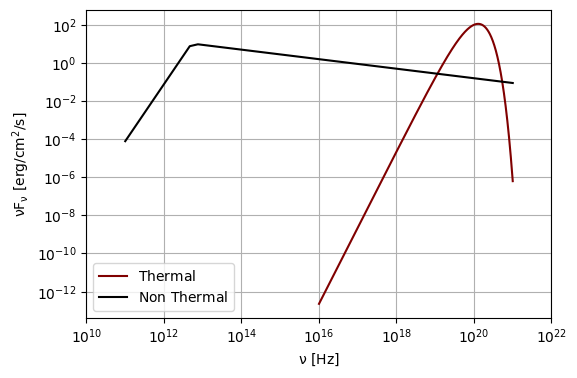

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

#ax.plot(flow_vals_masses1_ecc0, ff_vals_masses1_ecc0, marker='o', markersize=5, color='tab:green', label='e=0.0, Bank_ID = 3749195')
ax.plot(nu_vals, sed_wien_vals/(4*np.pi*(5300*3.086e18)**2), '-', color='maroon', label=r"$\mathrm{Thermal}$")
ax.plot(nu_vals1, nu_L_nu_nonthermal_vals/(4*np.pi*(5300*3.086e18)**2), '-', color='black', label=r"$\mathrm{Non~Thermal}$")
#ax.plot(R_vals, t_ang_vals*365*24*60*60, '--', color='tab:blue', label=r"$\mathrm{t}_{\mathrm{ang}}$")
#ax.plot(R_vals, t_breakout_rel_vals*365*24*60*60, '--', color='black', label=r"$\mathrm{t}_{\mathrm{breakout}}$")
#ax.plot(R_vals[7551], t_duration_vals[7551]*365*24*60*60, '.', ms=12, color='black')
#ax.plot(R, rho_AGN_test1, marker='o', markersize=5, color='tab:orange', label=r"$\mathcal{\rho_{AGN}}$")
#ax.plot(flow_vals_gwecc3, ff_vals_gwecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.plot(flow_vals_masses1_ecc2, ff_vals_masses1_ecc2, marker='o', markersize=5, color='tab:orange', label='e=0.2')
#ax.plot(flow_vals_masses1_ecc3, ff_vals_masses1_ecc3, marker='o', markersize=5, color='tab:green', label='e=0.3')
#ax.axhline(y=28*24*60*60, color='red', linestyle='--', lw=1.0)
#ax.axvline(x=2.5, color='black', linestyle='--', lw=1.0)
#ax.axvline(x=R_vals[7309], color='black', linestyle='--', lw=1.0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e10, 1e22])
#ax.set_ylim([1e-15, 1e-3])
ax.grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.set_title(r"$\mathcal{M}_c = 3.58\ [\mathrm{M}_\odot]$, $q=3.89$, $\chi_{eff}=-0.2$", fontsize=10)
ax.legend()
ax.set_xlabel(r"$\mathrm{\nu}~[\mathrm{Hz}]$", fontsize=10)
ax.set_ylabel(r"$\mathrm{\nu F_{\nu}}~[\mathrm{erg/cm^2/s}]$", fontsize=10)

#plt.savefig('flow_test/ff_v_flow_gw200105.pdf', bbox_inches='tight')
plt.show()

In [19]:
def gamma_min_prime(gamma_sf):
    """
    This is the minimum lorentz factor of the electrons.
    We use Equation 16 from Tagawa et al. 2023
    """
    return 40*(elec_frac/0.3)*((gamma_sf-1)/0.2)

def gamma_max_prime(rho_AGN, gamma_sf):
    """
    This is the minimum lorentz factor of the electrons.
    We use Equation 17 from Tagawa et al. 2023
    """
    xi = 1
    beta_sf = beta_from_gamma(gamma_sf) 
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    return 1e6*xi**(-1/2)*(beta_sf/0.5)*(A_gamma_sf/1.5)**(-1/4)*(mag_ampl/0.1)**(-1/4)*(rho_AGN/1e-16)**(-1/4)

def B_prime_sf(rho_AGN, gamma_sf):
    """
    Magnetic field in the shocked medium.
    We use Equation 18 from Tagawa et al. 2023
    """
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    return 6e2*(A_gamma_sf/1.5)**(1/2)*(mag_ampl/0.1)**(1/2)*(rho_AGN/1e-16)**(1/2)

def C_func(q):
    """
    Constants required to calculate the Lorentz factor below which synchrotron self-absorption is effective.
    We use Equation 23 from Tagawa et al. 2023
    """
    return 2**((q+1)/2)/(q+1)*math.gamma(q/4-1/12)*math.gamma(q/4+19/12)

def t_cooling(gamma_prime, gamma_sf, rho_AGN):
    """
    The cooling timescale for a particular Lorentz facrtor.
    Equation 20 from Tagawa et al. 2023
    """
    A_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3)
    return 30*(mag_ampl/0.1)**(-1)*(A_gamma_sf/1.5)**(-1)*(rho_AGN/1e-16)**(-1)*(gamma_prime/40)**(-1)*(gamma_sf/1.2)**(1.2)

def delta_shell(gamma_prime, gamma_sf, rho_AGN, beta_FS):
    """
    This is the the shell widht of electrons with a particular Lorentz factor emitting synchrotron photons.
    """
    return 5e11*(t_cooling(gamma_prime, gamma_sf, rho_AGN)/30)*(beta_FS/0.5)

def tau_func_new1(q, gamma_a_prime, gamma_1, gamma_2, rho_AGN, gamma_sf, beta_FS):
    """
    This is the tau_q function that is being used to calculate the Lorentz factor below which synchrotron self-absorption
    is effective. Equation 22 from Tagawa et al. 2023.
    This along with Equation 23 from the paper and the discussion below it that explain in which regime of the Lorentz factor
    would affect the choice of gamma_1 and gamma_2 imply that the equation to calculate gamma_a_prime is an implicit equation,
    and we use the brent approximation method to find the root of the equation.
    """
    gamma_a_constants = 1.6e-19*3e9*rho_AGN*delta_shell(gamma_a_prime, gamma_sf, rho_AGN, beta_FS)/(B_prime_sf(rho_AGN, gamma_sf)*1.67262192e-24)
    return np.pi/(3*np.sqrt(3))*(q**2+q-2)*(gamma_1)**(-5)/(1-(gamma_2/gamma_1)**(-q+1))*gamma_a_constants


"""
These are the two regimes which affect the choices of gamma_1 and gamma_2 in the calculation of the Lorentz factor below which synchrotron
self-absorption is effective. We write the function in this manner so it can directly be inputted into the brentq function from scipy.
"""
def gamma_a_prime_vals_eqn1(gamma_a_prime_test_1, q, gamma_min_prime, gamma_max_prime, rho_AGN, gamma_sf, beta_FS):
    return gamma_a_prime_test_1 - gamma_min_prime*(tau_func_new1(q, gamma_a_prime_test_1, gamma_min_prime, gamma_max_prime, rho_AGN, gamma_sf, beta_FS)*C_func(q+1))**(1/(q+4))

def gamma_a_prime_vals_eqn2(gamma_a_prime_test_1, q, gamma_min_prime, rho_AGN, gamma_sf, beta_FS):
    return gamma_a_prime_test_1 - gamma_min_prime*(tau_func_new1(q, gamma_a_prime_test_1, gamma_a_prime_test_1, gamma_min_prime, rho_AGN, gamma_sf, beta_FS)*C_func(q+1))**(1/(q+4))

In [20]:
gamma_a_prime_vals_new = np.zeros_like(gamma_max_prime_vals)
for id_val in np.arange(len(gamma_max_prime_vals)):
    try:
        #print("try", id_val)
        gamma_a_prime_vals_new[id_val] = brentq(gamma_a_prime_vals_eqn1, 1, gamma_max_prime_vals[id_val], args=(2.5, gamma_min_prime_vals[id_val], gamma_max_prime_vals[id_val], rho_AGN_vals[id_val], gamma_sf_vals[id_val], beta_vals[id_val]))
    except ValueError:
        #print("except", id_val)
        #print("except", id_val)
        #print((tau_func_new1(2, 1, 1, gamma_min_prime_vals[id_val], rho_AGN_vals[id_val], gamma_sf_vals[id_val], beta_vals[id_val])*C_func(2+1))**(1/(2+4)))
        #gamma_a_prime_vals_new[id_val] = brentq(gamma_a_prime_vals_eqn2, 1, gamma_min_prime_vals[id_val]-1, args=(2, gamma_min_prime_vals[id_val], rho_AGN_vals[id_val], gamma_sf_vals[id_val], beta_vals[id_val]))